## <font color="broun">Libraries and functions</font>

### `import necessary libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm 
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.datasets import make_classification, make_circles
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

### `get the features and label from the dataset`

In [2]:
def load_traing_testing_sets(trainSet,testSet):
    """load the data from training set and test set
    Input: trainingset , testingset 
    Output: X_train , X_test , y_train ,y_test
    """
    training_dataset = pd.read_csv(trainSet)
    print(type(training_dataset))
    testing_dataset = pd.read_csv(testSet)

    X_train = training_dataset.iloc[:,:5]
    X_test =  testing_dataset.iloc[:,:5]
    y_train = training_dataset.iloc[:,5]
    y_test = testing_dataset.iloc[:,5]

    return  X_train,y_train,X_test,y_test,training_dataset,testing_dataset

### `accuracy evaluation`

In [3]:
def getAccuracy(model, X_test, y_test):
    """get accouracy of the model
    Input: model, X_test, y_test
    Output: the accuracy score
    """
    return model.score(X_test,y_test)*100

### `get confusion matrix`

In [4]:
def getConfusionMatrix(model,X_test,y_test,title):
    """plot the confusion matrix of a model
    Input: model, X_test, y_test
    Output: print the confusion matrix
    """
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(title)
    plt.show()

### `plot decision boundery`

In [5]:
def plotRegions(model, X):
    """plot the regions of the training model  
    Input: model, X
    Output: plot the regions
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    ZZ = z.reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, alpha=0.2)

### `ploting the data`

In [6]:
def plotData(features, labels, cls, class_names,axis_labels):
    """plot the data for OVA Model
    Input: features, labels, cls, class_names
    Output: plot the data of the model
    """
    colors = ['r', 'b', 'g','y','']
    markers = ['o', '*', '+','x']
    for class_index in range(len(cls)):
        plt.xlabel(axis_labels[0])
        plt.ylabel(axis_labels[1]) 
        plt.scatter(features[labels == cls[class_index],0], 
                    features[labels == cls[class_index],1], 
                    c=colors[class_index], marker=markers[class_index], 
                    label=class_names[cls[class_index]])
    Title = "Dataset with {n} classes".format(n=int(len(cls)))
    plt.title(Title)
    plt.legend()

In [7]:
def plotDataOVO(features, labels, cls, class_names,axis_labels):
    """plot the data for OVO Model
    Input: features, labels, cls, class_names
    Output: plot the data of the model
    """
    colors = ['r', 'b','']
    markers = ['o', 'x']
    for class_index in range(len(cls)):
        plt.xlabel(axis_labels[0])
        plt.ylabel(axis_labels[1])
        plt.scatter(features[labels == cls[class_index],0], 
                    features[labels == cls[class_index],1], 
                    c=colors[class_index], marker=markers[class_index],
                    label=class_names[cls[class_index]])
    Title = "Dataset with {n} classes".format(n=int(len(cls)))
    plt.title(Title)
    plt.legend()

### `Get Class Names`


In [8]:
def getClassNames(target_names):
    """get the classes names of the target
    Input: target_names
    Output: return the classes names
    """
    cls_all = {}
    for i, label in enumerate(target_names):
        cls_all[i] = label
    return cls_all

In [9]:
def plotDataAndBoundries(X,y,Cls,classNames,model,axis_labels):
    """plot the data and boundries 
    Input: X,y,Cls,classNames,model
    Output: plot the data and boundries
    """
    plotData(X, y,Cls,classNames,axis_labels)
    plotRegions(model,X)
    plt.legend(loc="upper left")
    plt.show()

In [10]:
def plotDataAndBoundriesOVO(X,y,Cls,classNames,model,axis_labels):
    """plot the data and boundries for OVO model
    Input: X,y,Cls,classNames,model
    Output: plot the data and boundries
    """
    plotDataOVO(X, y,Cls,classNames,axis_labels)
    plotRegions(model,X)
    plt.legend(loc="upper left")
    plt.show()

In [11]:
#Prepare dataset for OVO Classifier
def prepareDataset(X, y, cls_remove=None):
    """Prepare dataset for OVO Classifier  
    Input: X, y, cls_remove(the classes labels that will be removed form the dataset)
    Output: return the specified 2 classes data after removing the rest classes from it
    """
    cls = [0, 1, 2, 3]
    if cls_remove is not None:
        labels = []
        features = []
        for index, (feat, label) in enumerate(zip(X, y)):
            if y[index] not in cls_remove:
                features.append(feat) 
                labels.append(label)
        cls.remove(cls_remove[0])
        cls.remove(cls_remove[1])
    else:
        features = X
        labels = y
    return np.array(features),np.array(labels), cls


 

--------------------------------------------------------------------------------------------------------------------------------

## `problem 1`

### <font color="broun">1.1 Load the DUMD dataset and convert categorical class labels to numerical values by using the LabelEncoder</font>

In [12]:
#used to load datasets online
# #'DUMD_train.csv'
# link_train = "https://drive.google.com/uc?id=1pbnWqF-Mo61q2Kpp1CF_rV-58_9mmOVs"
# #'DUMD_test.csv'
# link_test = "https://drive.google.com/uc?id=1JAut9ED1IKO95w1LKvCCOxMuERKqoKCW"

# X_train,y_train,X_test,y_test,training_dataset,testing_dataset=load_traing_testing_sets(link_train, link_test)

#load datasets offline
X_train,y_train,X_test,y_test,training_dataset,testing_dataset=load_traing_testing_sets('DUMD_train.csv','DUMD_test.csv')

<class 'pandas.core.frame.DataFrame'>


In [13]:
#show the X_trian data sample
X_train.head(10)

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.10,0.10,0.15,0.65,0.30
3,0.08,0.08,0.08,0.98,0.24
4,0.09,0.15,0.40,0.10,0.66
5,0.10,0.10,0.43,0.29,0.56
6,0.20,0.14,0.35,0.72,0.25
7,0.00,0.00,0.50,0.20,0.85
8,0.18,0.18,0.55,0.30,0.81
9,0.06,0.06,0.51,0.41,0.30


### `encoding the categorical data`

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()


# to display the target values before encoding 
new_df = pd.DataFrame(y_train)
Unique_values_of_UNS=new_df.drop_duplicates()
print(Unique_values_of_UNS)
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)
 
# to display the target values after encoding 
new_df = pd.DataFrame(y_train)
Unique_values_of_UNS=new_df.drop_duplicates()
print(Unique_values_of_UNS)

        UNS
0  Very Low
1      High
2    Medium
3       Low
   0
0  3
1  0
2  2
3  1


In [15]:
#labels of our target to remember
# High 0
# Low 1 
# Medium 2
# Very Low  3
class_names = ['High', 'Low', 'Medium', 'Very Low']

In [16]:
#take a copy form y_test data to using it later to get the confusion matrix for OVA models aggregations
check_testSet = y_test.copy()

plot pairwise relationships in a dataset but first we should convert target column to labels encoding


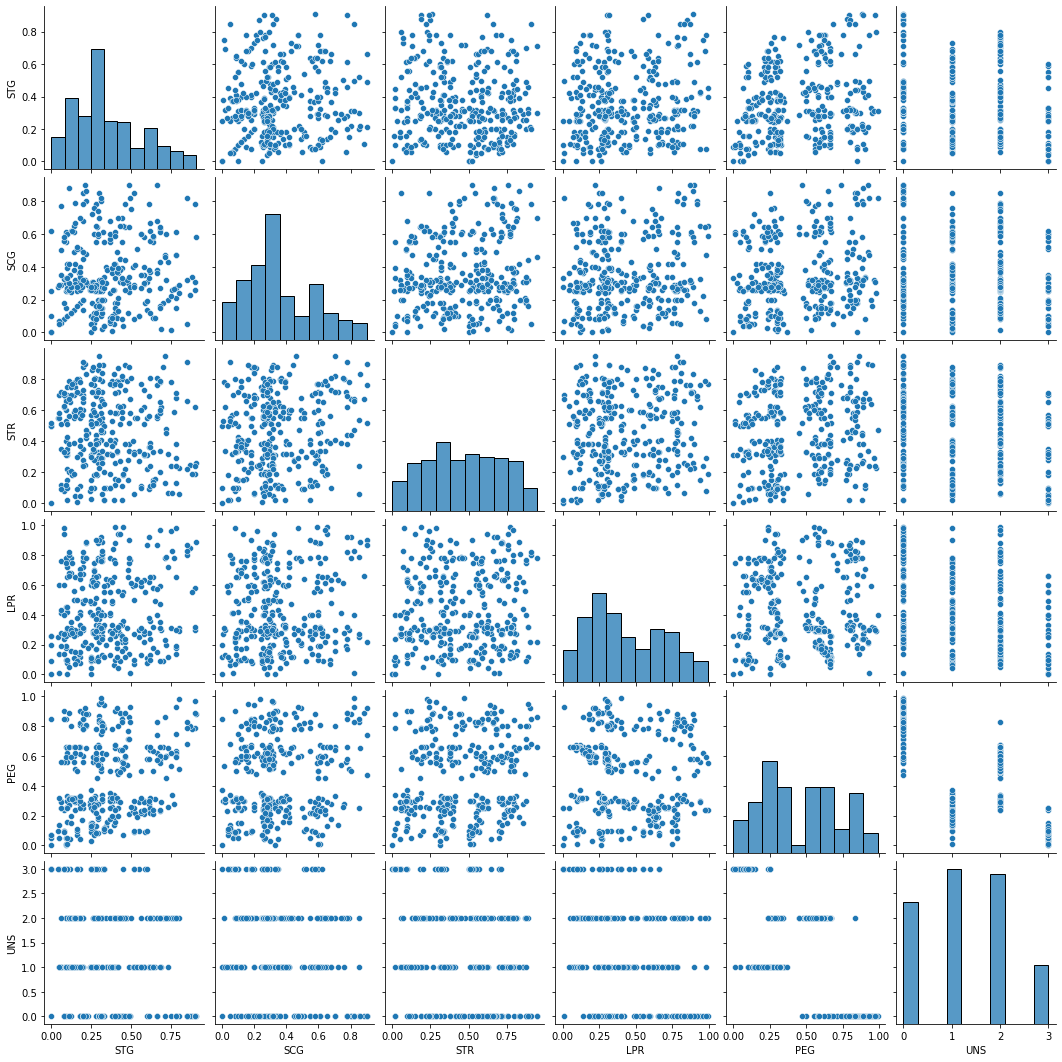

In [17]:
# Plot pairwise relationships in a dataset but first we should convert target column to labels encoding
print("plot pairwise relationships in a dataset but first we should convert target column to labels encoding")
training_dataset.iloc[:,5] = labelencoder_y.fit_transform(training_dataset.iloc[:,5])
sns.pairplot(training_dataset)

### <font color="green">Correlation between features</font>

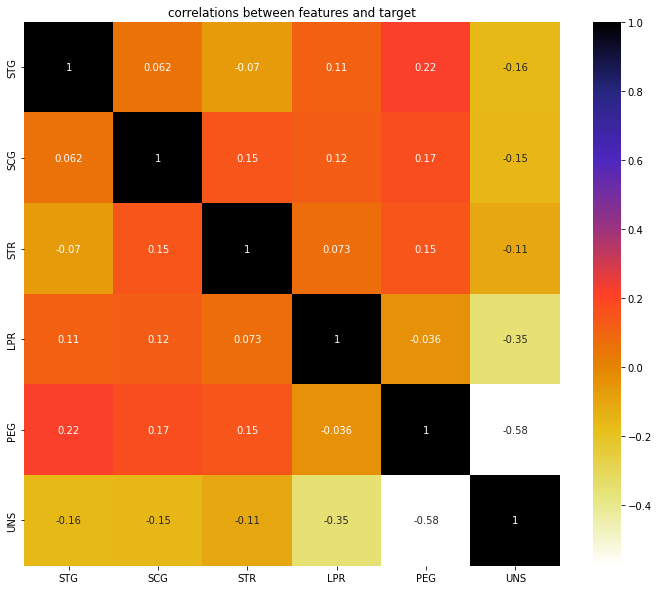

In [18]:
#correlations between features and target


correlation_matrix = training_dataset.corr()
# print('correlation_matrix',correlation_matrix) 

#Using Pearson Correlation
plt.figure(figsize=(12,10))
plt.title("correlations between features and target")
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### <font color="broun">1.2 Choose two features from DUMD dataset to apply SVM and Perceptron algorithms for classification</font>

### `feature selection`

### `show features impoertance (features -> target)`

In [19]:
#choose best 2 features based on select best sklearn function and result is [LPR,PEG] features in training data set
X_train = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)
#choose [LPR,PEG] features in testing data set
X_test =X_test.iloc[:,[-2,-1]].to_numpy()
#set Axis labels of our 2 featues that selected
axis_labels = ['LPR','PEG']
X_train_DF = pd.DataFrame(X_train) 
X_test_DF = pd.DataFrame(X_test) 

-------------------------------------------------------------------------------------------------------------------------------

In [20]:
 
#copy y_train , y_test for further using
y_train_ovo=y_train.copy()
y_test_ovo=y_test.copy()

`feture selection explination` :  
 
1- we took the correlation between the independant features and the dependant one and selected the most two correlated features and the result was  {PEG, LPR}.

### <font color="broun">1.3 Classify testing data by using SVM and Perceptron classifiers. Provide accuracies, confusion matrix and decision boundaries for both classifier.</font>

### `SVM OVO`

In [21]:
model_OVO = svm.SVC(kernel='rbf', decision_function_shape='ovo', C=1)
model_OVO.fit(X_train, y_train)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(model_OVO, X_test,y_test))) 
preSVMOVOtwofeatures_data = model_OVO.predict(X_test)

Accuracy of model: 98.75%


classification report

In [22]:
lst = np.array(Unique_values_of_UNS.values.tolist()).reshape(-1)

In [23]:
print('\nClassification Report for all class In SVR OVO')
print(classification_report(y_test, preSVMOVOtwofeatures_data, labels=list(lst)))


Classification Report for all class In SVR OVO
              precision    recall  f1-score   support

           3       1.00      0.91      0.95        11
           0       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        22
           1       0.96      1.00      0.98        26

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  1  0 10]]


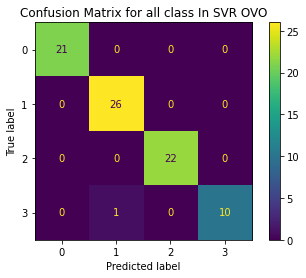

In [24]:
getConfusionMatrix(model_OVO,X_test,y_test,"Confusion Matrix for all class In SVR OVO")


Training for all classes High , Low , Medium , Very Low In SVM OVO


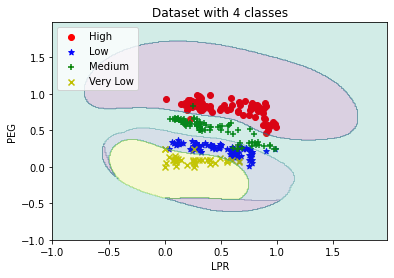

Testing for all classes High , Low , Medium , Very Low In SVM OVO


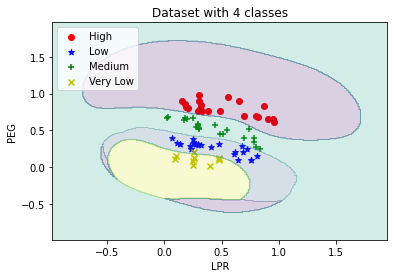

In [25]:
print("Training for all classes High , Low , Medium , Very Low In SVM OVO")
plotDataAndBoundries(X_train,y_train,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},model_OVO,axis_labels)

print("Testing for all classes High , Low , Medium , Very Low In SVM OVO")
plotDataAndBoundries(X_test,y_test,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},model_OVO,axis_labels)

### `SVM OVR`

In [26]:
model = svm.SVC(kernel='rbf', decision_function_shape='ovr', C=1)
model.fit(X_train, y_train)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(model, X_test,y_test)))
preSVMOVRtwofeatures_data = model.predict(X_test)

Accuracy of model: 98.75%


classification report

In [27]:
print('\nClassification Report for all class In SVM OVR ')
print(classification_report(y_test, preSVMOVRtwofeatures_data, labels=list(lst)))


Classification Report for all class In SVM OVR 
              precision    recall  f1-score   support

           3       1.00      0.91      0.95        11
           0       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        22
           1       0.96      1.00      0.98        26

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  1  0 10]]


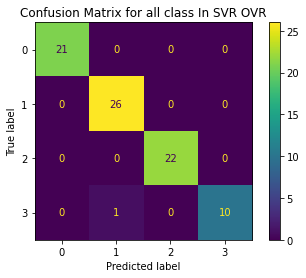

In [28]:
getConfusionMatrix(model,X_test,y_test,"Confusion Matrix for all class In SVR OVR")

Training for all classes High , Low , Medium , Very Low In SVM OVR


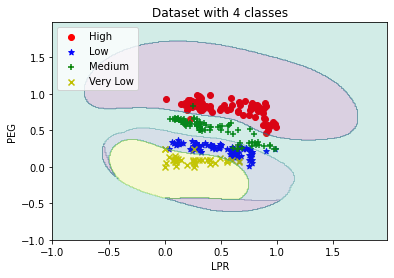

Testing for all classes High , Low , Medium , Very Low In SVM OVR


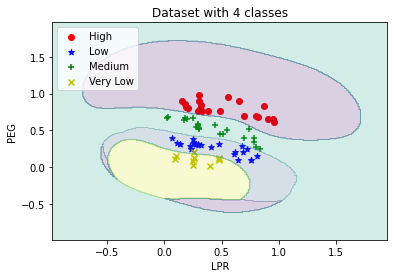

In [29]:
print("Training for all classes High , Low , Medium , Very Low In SVM OVR")
plotDataAndBoundries(X_train,y_train,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},model,axis_labels)

print("Testing for all classes High , Low , Medium , Very Low In SVM OVR")
plotDataAndBoundries(X_test,y_test,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},model,axis_labels)

### `perceptron`

In [30]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3)
clf.fit(X_train, y_train)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(clf, X_test,y_test))) 
prePertwofeatures_data = clf.predict(X_test)

Accuracy of model: 60.00%


classification report

In [31]:
print('\nClassification Report for all class In Perceptron')
print(classification_report(y_test, prePertwofeatures_data, labels=list(lst)))


Classification Report for all class In Perceptron
              precision    recall  f1-score   support

           3       1.00      0.09      0.17        11
           0       0.95      1.00      0.98        21
           2       0.00      0.00      0.00        22
           1       0.46      1.00      0.63        26

    accuracy                           0.60        80
   macro avg       0.60      0.52      0.44        80
weighted avg       0.54      0.60      0.48        80



[[21  0  0  0]
 [ 0 26  0  0]
 [ 1 21  0  0]
 [ 0 10  0  1]]


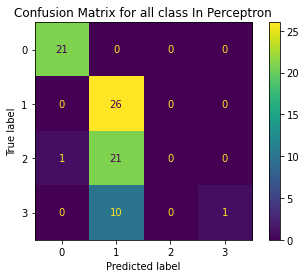

In [32]:
getConfusionMatrix(clf,X_test,y_test,"Confusion Matrix for all class In Perceptron")

Training for all classes High , Low , Medium , Very Low In Perceptron


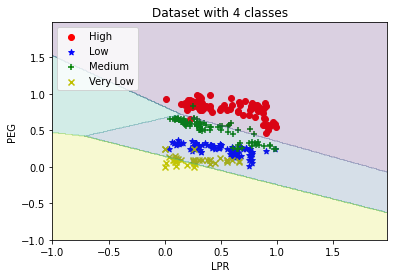

Testing for all classes High , Low , Medium , Very Low In Perceptron


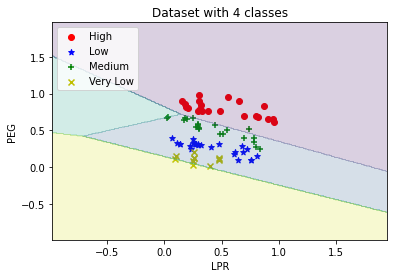

In [33]:
print("Training for all classes High , Low , Medium , Very Low In Perceptron")
plotDataAndBoundries(X_train,y_train,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},clf,axis_labels)

print("Testing for all classes High , Low , Medium , Very Low In Perceptron")
plotDataAndBoundries(X_test,y_test,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},clf,axis_labels)

----------------------------------------------------------------------------------------------------------------------------------

## `problem 2`

### `Build OvR-SVM, test on DUMD testing dataset with obtained features from Problem 1.`

### <font color="broun">2.1.1 Obtain the binarized labels (OvR)</font>

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer

In [35]:
y_train_before_binarizing = y_train.copy()
y_test_before_binarizing = y_test.copy()
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train.reshape((-1,1)))
y_test = mlb.fit_transform(y_test.reshape((-1,1)))
  


# print(f"y_train after encoding : {y_train}")
# print(f"y_test after encoding : {y_test}")

In [36]:
y_train

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [37]:
# for training 
y1 = y_train[:,0]
y2 = y_train[:,1]
y3 = y_train[:,2]
y4 = y_train[:,3]

# for testing 
yT1 = y_test[:,0]
yT2 = y_test[:,1]
yT3 = y_test[:,2]
yT4 = y_test[:,3]

### <font color="broun">2.1.2 Obtain the SVM’s accuracy</font>

### <font color="broun">2.1.3 Plot SVM’s decision boundary</font>

### <font color="broun">2.1.4 Make comments on model’s performance on each binary classification problem.</font>

In [38]:
def handMadeOVA(features,Label,x_test,y_test,classification_report_title,labels):
    """
    used to make OVA model redicition
    Input : features,Label,x_test,y_test
    Output : returns the probabilities of each model (y_pred) and the model itself (oVoClf)
    """
    oVoClf = svm.SVC(kernel='rbf', probability=True)
    oVoClf.fit(features, Label)
    predicted_labesl = oVoClf.predict(x_test)
    print('Classification Report for {}'.format(classification_report_title))
    print(classification_report(y_test, predicted_labesl, labels=list(labels)))
    print('Accuracy of the classifier is : {:.2f}%'.format(getAccuracy(oVoClf, x_test,y_test)))
    getConfusionMatrix(oVoClf,x_test,y_test,"Confusion Matrix for {}".format(classification_report_title))
    y_pred = oVoClf.predict_proba(x_test)[:,1].reshape(-1,1)
    
    return y_pred ,oVoClf 

Classification Report for High class vs the rest classes Low , Medium , Very Low
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        21

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy of the classifier is : 100.00%
[[59  0]
 [ 0 21]]


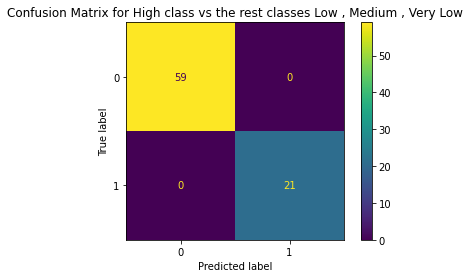

In [39]:

# 1st classifier 
y1_pred , handMadeModel1 =handMadeOVA(X_train,y1,X_test,yT1,"High class vs the rest classes Low , Medium , Very Low",[0,1]) 

classification report

Training for High class vs the rest classes Low , Medium , Very Low


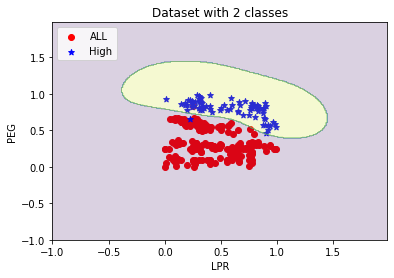

Testing for High class vs the rest classes Low , Medium , Very Low


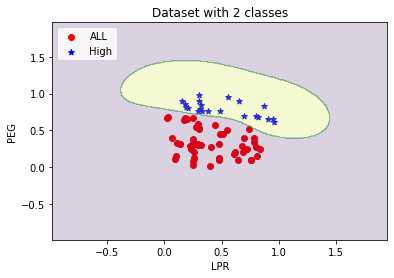

In [40]:
print("Training for High class vs the rest classes Low , Medium , Very Low")
plotDataAndBoundries(X_train,y1,[0,1],{0:'ALL', 1:'High'},handMadeModel1,axis_labels)
print("Testing for High class vs the rest classes Low , Medium , Very Low")
plotDataAndBoundries(X_test,yT1,[0,1],{0:'ALL', 1:'High'},handMadeModel1,axis_labels)


Classification Report for Low class vs the rest classes High , Medium , Very Low
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.93      1.00      0.96        26

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

Accuracy of the classifier is : 97.50%
[[52  2]
 [ 0 26]]


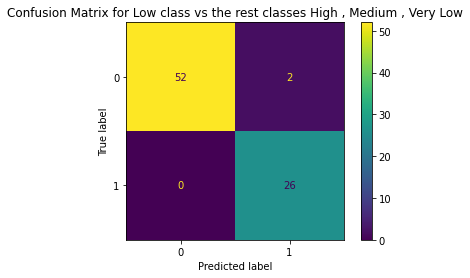

In [41]:
# 2nd classifier 
y2_pred, handMadeModel2 =handMadeOVA(X_train,y2,X_test,yT2,"Low class vs the rest classes High , Medium , Very Low",[0,1]) 

Training for Low class vs the rest classes High , Medium , Very Low


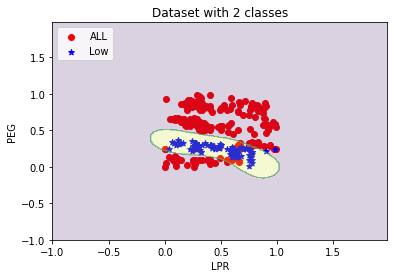

Testing for Low class vs the rest classes High , Medium , Very Low


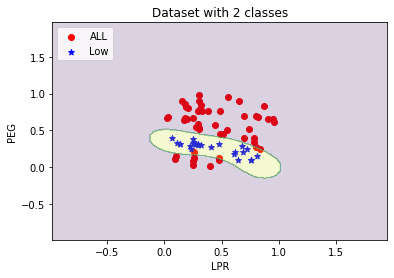

In [42]:
print("Training for Low class vs the rest classes High , Medium , Very Low")
plotDataAndBoundries(X_train,y2,[0,1],{0:'ALL', 1:'Low'},handMadeModel2,axis_labels)
print("Testing for Low class vs the rest classes High , Medium , Very Low") 
plotDataAndBoundries(X_test,yT2,[0,1],{0:'ALL', 1:'Low'},handMadeModel2,axis_labels)



Classification Report for Medium class vs the rest classes High , Low , Very Low
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        22

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy of the classifier is : 100.00%
[[58  0]
 [ 0 22]]


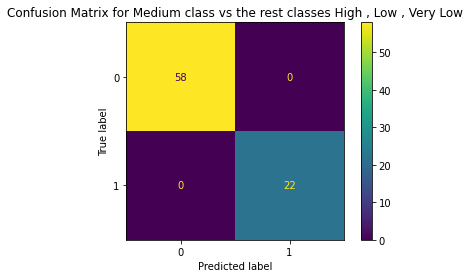

In [43]:
# 3rd classifier 
y3_pred, handMadeModel3 =handMadeOVA(X_train,y3,X_test,yT3,"Medium class vs the rest classes High , Low , Very Low",[0,1])

Training for Medium class vs the rest classes High , Low , Very Low


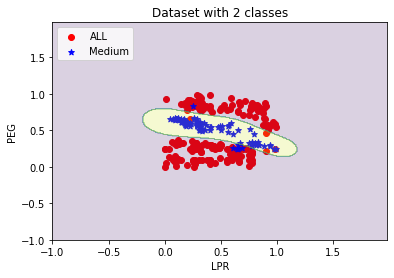

Testing for Medium class vs the rest classes High , Low , Very Low


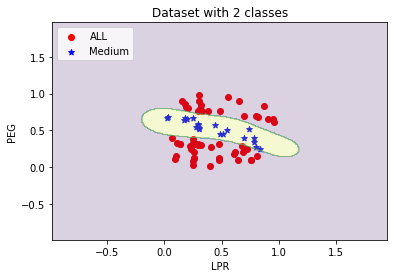

In [44]:
print("Training for Medium class vs the rest classes High , Low , Very Low")
plotDataAndBoundries(X_train,y3,[0,1],{0:'ALL', 1:'Medium'},handMadeModel3,axis_labels)
print("Testing for Medium class vs the rest classes High , Low , Very Low") 
plotDataAndBoundries(X_test,yT3,[0,1],{0:'ALL', 1:'Medium'},handMadeModel3,axis_labels)



Classification Report for Very Low class vs the rest classes High , Low , Medium
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.95      0.97        80
weighted avg       0.99      0.99      0.99        80

Accuracy of the classifier is : 98.75%
[[69  0]
 [ 1 10]]


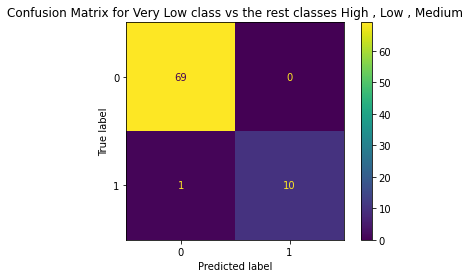

In [45]:
# 4th classifier 
y4_pred, handMadeModel4 =handMadeOVA(X_train,y4,X_test,yT4,"Very Low class vs the rest classes High , Low , Medium",[0,1]) 

Training for Very Low class vs the rest classes High , Low , Medium


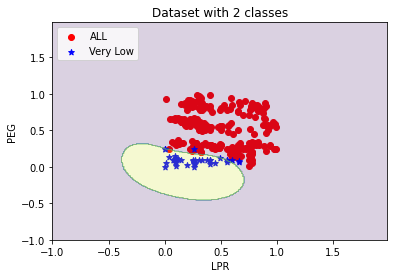

Testing for Very Low class vs the rest classes High , Low , Medium


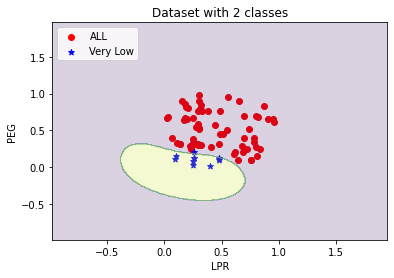

In [46]:
print("Training for Very Low class vs the rest classes High , Low , Medium")
plotDataAndBoundries(X_train,y4,[0,1],{0:'ALL', 1:'Very Low'},handMadeModel4,axis_labels)
print("Testing for Very Low class vs the rest classes High , Low , Medium")
plotDataAndBoundries(X_test,yT4,[0,1],{0:'ALL', 1:'Very Low'},handMadeModel4,axis_labels)

In [47]:
#combine all the predicted results form the 4 models
y_all = np.hstack((y1_pred, y2_pred, y3_pred,y4_pred))

--------------------------------------------------------------------------------------------------------------------------------

### <font color="broun"> 2.2 Use argmax to aggregate confidence scores and obtain the final predicted labels and obtain the performance (i.e., confusion matrix, accuracy, plotting correct and wrong prediction points) of OvR-SVM</font>

In [48]:
m1 = mlb.classes_[np.argmax(y_all, axis=1)]

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(list(check_testSet),list(m1))
print(cm1)

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  1  0 10]]


In [50]:
cm1

array([[21,  0,  0,  0],
       [ 0, 26,  0,  0],
       [ 0,  0, 22,  0],
       [ 0,  1,  0, 10]])

Confusion Matrix for OVR argmax list


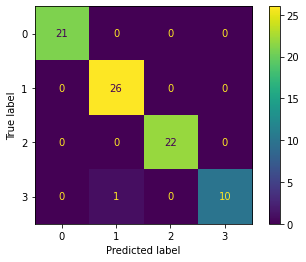

In [51]:
# ploting the confusion matrix 
print("Confusion Matrix for OVR argmax list")
p1=ConfusionMatrixDisplay(cm1,display_labels= [0,1,2,3])
p1.plot()
 

In [52]:
#print the accuracy of the aggregation
from sklearn.metrics import accuracy_score
print("Accuarcy {} %".format(accuracy_score(list(check_testSet),list(m1))*100))

Accuarcy 98.75 %


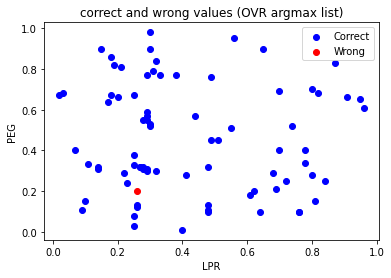

In [53]:
#plotting correct and wrong prediction points
_,ax = plt.subplots()

ax.scatter(x=X_test_DF[check_testSet==m1][0],
           y=X_test_DF[check_testSet==m1][1], 
           c = 'blue', label = 'Correct', alpha = 1)
ax.scatter(x=X_test_DF[check_testSet!=m1][0],
           y=X_test_DF[check_testSet!=m1][1], 
           c = 'red', label = 'Wrong', alpha = 1)

plt.title('correct and wrong values (OVR argmax list)')
plt.xlabel(axis_labels[0])
plt.ylabel(axis_labels[1])
plt.legend()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

## `problem 3`

### `Build OvO-SVM, test on DUMD testing dataset with obtained features from Problem 1.`

### <font color="broun">2.1.2 Obtain the SVM’s accuracy</font>

### <font color="broun">2.1.3 Plot SVM’s decision boundary</font>

### <font color="broun">2.1.4 Make comments on model’s performance on each binary classification problem.</font>

In [54]:
def handMadeOVO(features,Label,x_test,y_test,title):
    """
    used to make OVO model redicition
    Input : features,Label,x_test,y_test
    Output : returns the probabilities of each model (y_pred0, y_pred1) and the model itself (oVoClf)
    """
    oVoClf = svm.SVC(kernel='rbf', decision_function_shape='ovo',probability=True)
    oVoClf.fit(features, Label)
    print('Accuracy of the classifier is : {:.2f}%'.format(getAccuracy(oVoClf, x_test,y_test)))
    getConfusionMatrix(oVoClf,x_test,y_test,title)
    y_pred_0 = oVoClf.predict_proba(features)[:,0]
    y_pred_1 = oVoClf.predict_proba(features)[:,1]
    return y_pred_0,y_pred_1,oVoClf 

In [55]:
#prepare test and train data for 1st classifier first class (High) vs second class (Low)
xtrain,ytrain, cls_newtrian1 = prepareDataset( X_train ,y_train_ovo, cls_remove=[2,3])
xtest,ytest, cls_newtest1 = prepareDataset( X_test ,y_test_ovo, cls_remove=[2,3])

Accuracy of the classifier is : 100.00%
[[21  0]
 [ 0 26]]


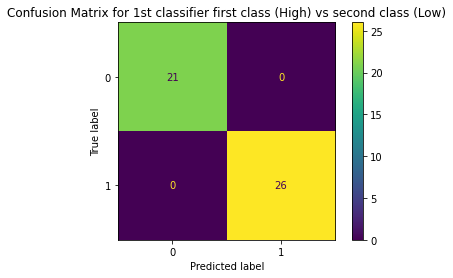

Class names = High , Low
Updated class index: [0, 1]
Number of samples: 323
Number of features: 2

Classification Report for first class High:

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        21
           1       0.57      1.00      0.72        26
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        11

    accuracy                           0.59        80
   macro avg       0.30      0.50      0.37        80
weighted avg       0.35      0.59      0.44        80



In [56]:
# 1st classifier first class (High) vs second class (Low)  
ypred1_0,ypred1_1,handMadeModelOVO1=handMadeOVO(xtrain,ytrain,xtest,ytest,"Confusion Matrix for 1st classifier first class (High) vs second class (Low)") 
print('Class names = {} , {}'.format(class_names[cls_newtest1[0]],class_names[cls_newtest1[1]]))
print('Updated class index:', cls_newtest1)
print("Number of samples:", X_train.shape[0])
print("Number of features:", X_train.shape[1])
#classification reports
print('\nClassification Report for first class {}:\n'.format(class_names[cls_newtest1[0]]))
print(classification_report(list(check_testSet), list(handMadeModelOVO1.predict(X_test))))


Training for 1st classifier first class (High) vs second class (Low) 


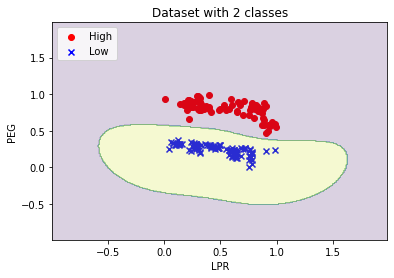

Testing for 1st classifier first class (High) vs second class (Low) 


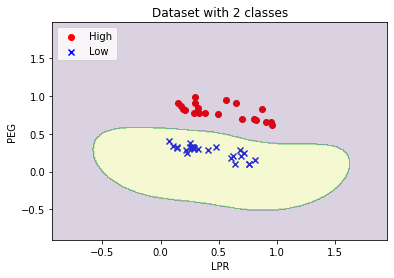

In [57]:
#plot data and boundries for 1st classifier first class (High) vs second class (Low)  
print('Training for 1st classifier first class (High) vs second class (Low) ')
plotDataAndBoundriesOVO(xtrain,ytrain,[0,1],{0:'High', 1:'Low'},handMadeModelOVO1,axis_labels)
print('Testing for 1st classifier first class (High) vs second class (Low) ')
plotDataAndBoundriesOVO(xtest,ytest,[0,1],{0:'High', 1:'Low'},handMadeModelOVO1,axis_labels)


In [58]:
#prepare test and train data for 2nd classifier first class (High) vs third class (Medium)
xtrain,ytrain, cls_newtrian2 = prepareDataset( X_train ,y_train_ovo, cls_remove=[1,3])
xtest,ytest, cls_newtest2 = prepareDataset( X_test ,y_test_ovo, cls_remove=[1,3])

Accuracy of the classifier is : 100.00%
[[21  0]
 [ 0 22]]


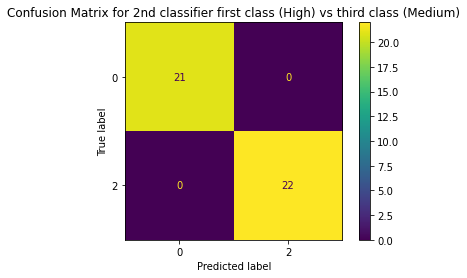

Class names = High , Medium
Updated class index: [0, 2]
Number of samples: 323
Number of features: 2

Classification Report for first class High:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.00      0.00      0.00        26
           2       0.37      1.00      0.54        22
           3       0.00      0.00      0.00        11

    accuracy                           0.54        80
   macro avg       0.34      0.50      0.39        80
weighted avg       0.37      0.54      0.41        80



In [59]:
# 2nd classifier first class (High) vs third class (Medium)  
ypred2_0,ypred2_1,handMadeModelOVO2=handMadeOVO(xtrain,ytrain,xtest,ytest,"Confusion Matrix for 2nd classifier first class (High) vs third class (Medium)") 
print('Class names = {} , {}'.format(class_names[cls_newtest2[0]],class_names[cls_newtest2[1]]))
print('Updated class index:', cls_newtest2)
print("Number of samples:", X_train.shape[0])
print("Number of features:", X_train.shape[1])
#classification reports
print('\nClassification Report for first class {}:\n'.format(class_names[cls_newtest2[0]]))
print(classification_report(list(check_testSet), list(handMadeModelOVO2.predict(X_test))))

Training for 2nd classifier first class (High) vs third class (Medium)


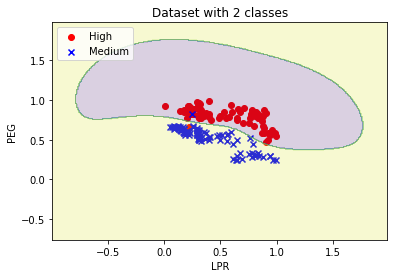

Testing for 2nd classifier first class (High) vs third class (Medium)


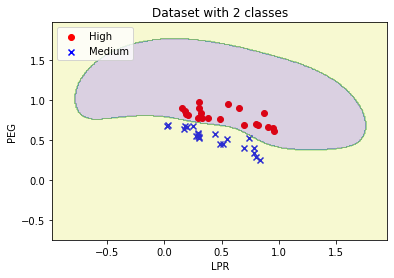

In [60]:
#plot data and boundries for 2nd classifier first class (High) vs third class (Medium)
print('Training for 2nd classifier first class (High) vs third class (Medium)')
plotDataAndBoundriesOVO(xtrain,ytrain,[0,2],{0:'High', 2:'Medium'},handMadeModelOVO2,axis_labels)
print('Testing for 2nd classifier first class (High) vs third class (Medium)')
plotDataAndBoundriesOVO(xtest,ytest,[0,2],{0:'High', 2:'Medium'},handMadeModelOVO2,axis_labels)


In [61]:
#prepare test and train data for 3rd classifier first class (High) vs fourth class (Very Low)
xtrain,ytrain, cls_newtrian3 = prepareDataset( X_train ,y_train_ovo, cls_remove=[1,2])
xtest,ytest, cls_newtest3 = prepareDataset( X_test ,y_test_ovo, cls_remove=[1,2])

Accuracy of the classifier is : 100.00%
[[21  0]
 [ 0 11]]


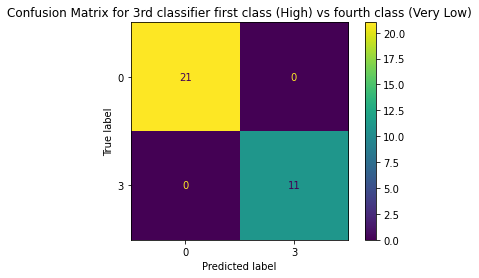

Class names = High , Very Low
Updated class index: [0, 3]
Number of samples: 323
Number of features: 2

Classification Report for first class High:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        21
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        22
           3       0.29      1.00      0.45        11

    accuracy                           0.40        80
   macro avg       0.20      0.50      0.28        80
weighted avg       0.17      0.40      0.24        80



In [62]:
# 3rd classifier first class (High) vs fourth class (Very Low)
ypred3_0,ypred3_1,handMadeModelOVO3=handMadeOVO(xtrain,ytrain,xtest,ytest,"Confusion Matrix for 3rd classifier first class (High) vs fourth class (Very Low)") 
print('Class names = {} , {}'.format(class_names[cls_newtest3[0]],class_names[cls_newtest3[1]]))
print('Updated class index:', cls_newtest3)
print("Number of samples:", X_train.shape[0])
print("Number of features:", X_train.shape[1])
#classification reports
print('\nClassification Report for first class {}:\n'.format(class_names[cls_newtest3[0]]))
print(classification_report(list(check_testSet), list(handMadeModelOVO3.predict(X_test))))

Training for 3rd classifier first class (High) vs fourth class (Very Low)


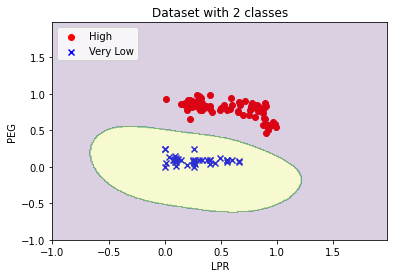

Testing for 3rd classifier first class (High) vs fourth class (Very Low)


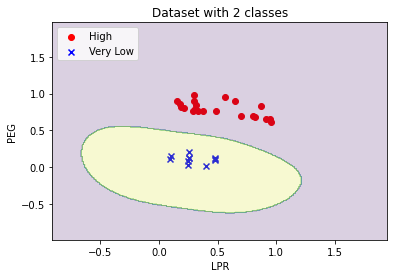

In [63]:
#plot data and boundries for 3rd classifier first class (High) vs fourth class (Very Low)  
print('Training for 3rd classifier first class (High) vs fourth class (Very Low)')
plotDataAndBoundriesOVO(xtrain,ytrain,[0,3],{0:'High', 3:'Very Low'},handMadeModelOVO3,axis_labels)
print('Testing for 3rd classifier first class (High) vs fourth class (Very Low)')
plotDataAndBoundriesOVO(xtest,ytest,[0,3],{0:'High', 3:'Very Low'},handMadeModelOVO3,axis_labels)


In [64]:
#prepare test and train data for 4th classifier second class (Low) vs third class (Medium)
xtrain,ytrain, cls_newtrian4 = prepareDataset( X_train ,y_train_ovo, cls_remove=[0,3])
xtest,ytest, cls_newtest4 = prepareDataset( X_test ,y_test_ovo, cls_remove=[0,3])

Accuracy of the classifier is : 100.00%
[[26  0]
 [ 0 22]]


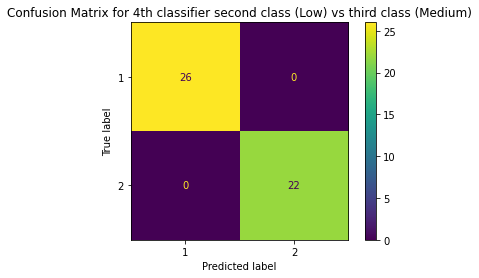

Class names = Low , Medium
Updated class index: [1, 2]
Number of samples: 323
Number of features: 2

Classification Report for first class Low:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.70      1.00      0.83        26
           2       0.51      1.00      0.68        22
           3       0.00      0.00      0.00        11

    accuracy                           0.60        80
   macro avg       0.30      0.50      0.38        80
weighted avg       0.37      0.60      0.45        80



In [65]:
# 4th classifier second class (Low) vs third class (Medium) 
ypred4_0,ypred4_1,handMadeModelOVO4=handMadeOVO(xtrain,ytrain,xtest,ytest,"Confusion Matrix for 4th classifier second class (Low) vs third class (Medium)") 
print('Class names = {} , {}'.format(class_names[cls_newtest4[0]],class_names[cls_newtest4[1]]))
print('Updated class index:', cls_newtest4)
print("Number of samples:", X_train.shape[0])
print("Number of features:", X_train.shape[1])
#classification reports
print('\nClassification Report for first class {}:\n'.format(class_names[cls_newtest4[0]]))
print(classification_report(list(check_testSet), list(handMadeModelOVO4.predict(X_test))))

Training for 4th classifier second class (Low) vs third class (Medium)


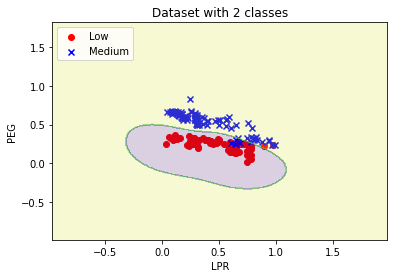

Testing for 4th classifier second class (Low) vs third class (Medium)


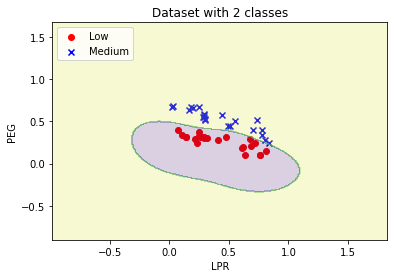

In [66]:
#plot data and boundries for 4th classifier second class (Low) vs third class (Medium)
print('Training for 4th classifier second class (Low) vs third class (Medium)')
plotDataAndBoundriesOVO(xtrain,ytrain,[1,2],{1:'Low', 2:'Medium'},handMadeModelOVO4,axis_labels)
print('Testing for 4th classifier second class (Low) vs third class (Medium)')
plotDataAndBoundriesOVO(xtest,ytest,[1,2],{1:'Low', 2:'Medium'},handMadeModelOVO4,axis_labels)


In [67]:
#prepare test and train data for 5th classifier second class (Low) vs fourth class (Very Low)
xtrain,ytrain, cls_newtrian5 = prepareDataset( X_train ,y_train_ovo, cls_remove=[0,2])
xtest,ytest, cls_newtest5 = prepareDataset( X_test ,y_test_ovo, cls_remove=[0,2])

Accuracy of the classifier is : 97.30%
[[26  0]
 [ 1 10]]


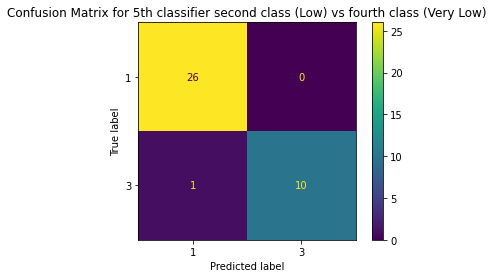

Class names = Low , Very Low
Updated class index: [1, 3]
Number of samples: 323
Number of features: 2

Classification Report for first class Low:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.37      1.00      0.54        26
           2       0.00      0.00      0.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.45        80
   macro avg       0.34      0.48      0.37        80
weighted avg       0.26      0.45      0.31        80



In [68]:
# 5th classifier second class (Low) vs fourth class (Very Low)
ypred5_0,ypred5_1,handMadeModelOVO5=handMadeOVO(xtrain,ytrain,xtest,ytest,"Confusion Matrix for 5th classifier second class (Low) vs fourth class (Very Low)") 
print('Class names = {} , {}'.format(class_names[cls_newtest5[0]],class_names[cls_newtest5[1]]))
print('Updated class index:', cls_newtest5)
print("Number of samples:", X_train.shape[0])
print("Number of features:", X_train.shape[1])
#classification reports
print('\nClassification Report for first class {}:\n'.format(class_names[cls_newtest5[0]]))
print(classification_report(list(check_testSet), list(handMadeModelOVO5.predict(X_test))))

Training for 5th classifier second class (Low) vs fourth class (Very Low)


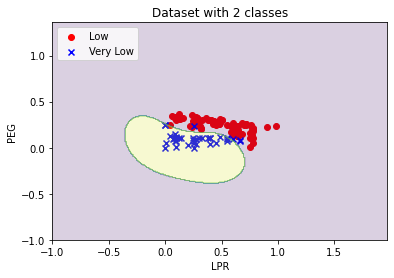

Testing for 5th classifier second class (Low) vs fourth class (Very Low)


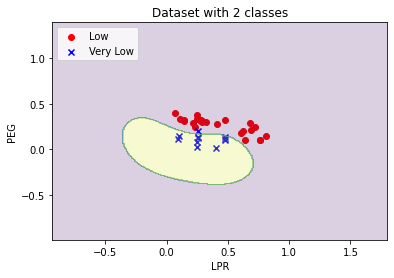

In [69]:
#plot data and boundries for 5th classifier second class (Low) vs fourth class (Very Low)  
print('Training for 5th classifier second class (Low) vs fourth class (Very Low)')
plotDataAndBoundriesOVO(xtrain,ytrain,[1,3],{1:'Low', 3:'Very Low'},handMadeModelOVO5,axis_labels)
print('Testing for 5th classifier second class (Low) vs fourth class (Very Low)')
plotDataAndBoundriesOVO(xtest,ytest,[1,3],{1:'Low', 3:'Very Low'},handMadeModelOVO5,axis_labels)


In [70]:
#prepare test and train data for 6th classifier third class (Medium) vs fourth class (Very Low)
xtrain,ytrain, cls_newtrian6 = prepareDataset( X_train ,y_train_ovo, cls_remove=[0,1])
xtest,ytest, cls_newtest6 = prepareDataset( X_test ,y_test_ovo, cls_remove=[0,1])

Accuracy of the classifier is : 100.00%
[[22  0]
 [ 0 11]]


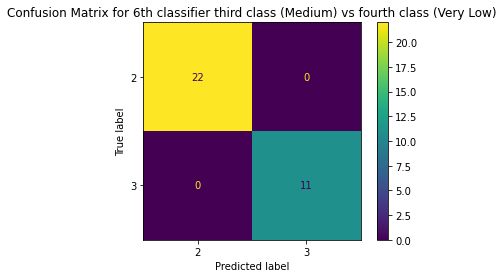

Class names = Medium , Very Low
Updated class index: [2, 3]
Number of samples: 323
Number of features: 2

Classification Report for first class Medium:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        26
           2       0.43      1.00      0.60        22
           3       0.38      1.00      0.55        11

    accuracy                           0.41        80
   macro avg       0.20      0.50      0.29        80
weighted avg       0.17      0.41      0.24        80



In [71]:
# 6th classifier third class (Medium) vs fourth class (Very Low)
ypred6_0,ypred6_1,handMadeModelOVO6=handMadeOVO(xtrain,ytrain,xtest,ytest,"Confusion Matrix for 6th classifier third class (Medium) vs fourth class (Very Low)") 
print('Class names = {} , {}'.format(class_names[cls_newtest6[0]],class_names[cls_newtest6[1]]))
print('Updated class index:', cls_newtest6)
print("Number of samples:", X_train.shape[0])
print("Number of features:", X_train.shape[1])
#classification reports
print('\nClassification Report for first class {}:\n'.format(class_names[cls_newtest6[0]]))
print(classification_report(list(check_testSet), list(handMadeModelOVO6.predict(X_test))))

Training for 6th classifier third class (Medium) vs fourth class (Very Low)


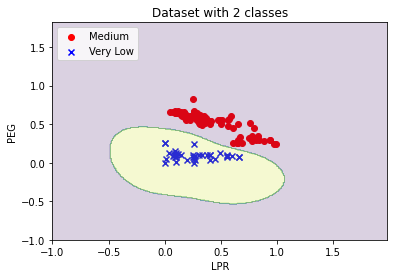

Testing for 6th classifier third class (Medium) vs fourth class (Very Low)


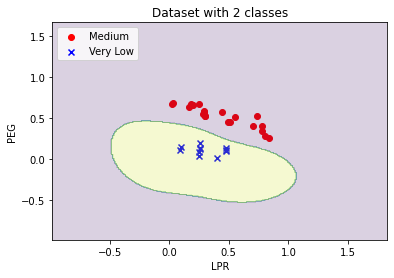

In [72]:
#plot data and boundries for 6th classifier third class (Medium) vs fourth class (Very Low)
print('Training for 6th classifier third class (Medium) vs fourth class (Very Low)')
plotDataAndBoundriesOVO(xtrain,ytrain,[2,3],{2:'Medium', 3:'Very Low'},handMadeModelOVO6,axis_labels)
print('Testing for 6th classifier third class (Medium) vs fourth class (Very Low)')
plotDataAndBoundriesOVO(xtest,ytest,[2,3],{2:'Medium', 3:'Very Low'},handMadeModelOVO6,axis_labels)


In [73]:
#check all class labels for all our models
print(cls_newtrian1)
print(cls_newtrian2)
print(cls_newtrian3)
print(cls_newtrian4)
print(cls_newtrian5)
print(cls_newtrian6)


[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]


In [74]:
# depending on the length of the X_test set 
#I'll create a list of list of zeros each item is a 4X1 list
weightMatrix = []
for i in range(len(X_test)):
    weightMatrix.append(list(np.zeros(4,int)))

In [75]:
# depending on the length of the X_test set 
#I'll create a list of list of zeros each item is a 4X1 list
votingMatrix = []
for i in range(len(X_test)):
    votingMatrix.append(list(np.zeros(4,int)))

In [76]:
def fillWeightMatrix(weightMatrix,ypred_0,ypred_1,class0,class1):
    for i in range(len(X_test)):
        weightMatrix[i][class0] += ypred_0[i]
        weightMatrix[i][class1] += ypred_1[i]

In [77]:
def fillvotingMatrix(votingMatrix,prediction):
    for i in range(len(X_test)):
        votingMatrix[i][prediction[i]] += 1

In [78]:
fillWeightMatrix(weightMatrix,ypred1_0,ypred1_1,cls_newtrian1[0],cls_newtrian1[1])
fillWeightMatrix(weightMatrix,ypred2_0,ypred2_1,cls_newtrian2[0],cls_newtrian2[1])
fillWeightMatrix(weightMatrix,ypred3_0,ypred3_1,cls_newtrian3[0],cls_newtrian3[1])
fillWeightMatrix(weightMatrix,ypred4_0,ypred4_1,cls_newtrian4[0],cls_newtrian4[1])
fillWeightMatrix(weightMatrix,ypred5_0,ypred5_1,cls_newtrian5[0],cls_newtrian5[1])
fillWeightMatrix(weightMatrix,ypred6_0,ypred6_1,cls_newtrian6[0],cls_newtrian6[1])


In [79]:
votingResults = mlb.classes_[np.argmax(weightMatrix, axis=1)]
 

In [80]:
# metrics 
# model evaluation
print(classification_report(list(check_testSet),list(votingResults)))

              precision    recall  f1-score   support

           0       0.33      0.24      0.28        21
           1       0.32      0.35      0.33        26
           2       0.38      0.59      0.46        22
           3       0.00      0.00      0.00        11

    accuracy                           0.34        80
   macro avg       0.26      0.29      0.27        80
weighted avg       0.30      0.34      0.31        80



In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(check_testSet),list(votingResults))
print(cm)

[[ 5  9  7  0]
 [ 5  9 10  2]
 [ 3  5 13  1]
 [ 2  5  4  0]]


Confusion Matrix for the first approach (weight matrix)


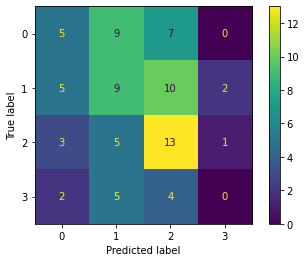

In [82]:
# ploting the confusion matrix 
print("Confusion Matrix for the first approach (weight matrix)")
p=ConfusionMatrixDisplay(cm,display_labels= [0,1,2,3])
p.plot()

In [83]:
print(f"Accuracy depending on the maximum of( summation of probabilities ) : {accuracy_score(list(check_testSet),list(votingResults))*100}%")

Accuracy depending on the maximum of( summation of probabilities ) : 33.75%


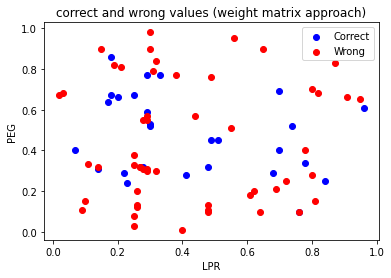

In [84]:
 
#plotting correct and wrong prediction points
_,ax = plt.subplots()

ax.scatter(x=X_test_DF[check_testSet==votingResults][0], y=X_test_DF[check_testSet==votingResults][1], c = 'blue', label = 'Correct', alpha = 1)
ax.scatter(x=X_test_DF[check_testSet!=votingResults][0], y=X_test_DF[check_testSet!=votingResults][1], c = 'red', label = 'Wrong', alpha = 1)
 
plt.title('correct and wrong values (weight matrix approach)')
plt.xlabel(axis_labels[0])
plt.ylabel(axis_labels[1])
 
plt.legend()
plt.show()

---------------------------------------------------------------------------------------------------------------------

In [85]:
p1=list(handMadeModelOVO1.predict(X_test))
p2=list(handMadeModelOVO2.predict(X_test))
p3=list(handMadeModelOVO3.predict(X_test))
p4=list(handMadeModelOVO4.predict(X_test))
p5=list(handMadeModelOVO5.predict(X_test))
p6=list(handMadeModelOVO6.predict(X_test))
fillvotingMatrix(votingMatrix,p1)
fillvotingMatrix(votingMatrix,p2)
fillvotingMatrix(votingMatrix,p3)
fillvotingMatrix(votingMatrix,p4)
fillvotingMatrix(votingMatrix,p5)
fillvotingMatrix(votingMatrix,p6)


In [86]:
handUpResults = mlb.classes_[np.argmax(votingMatrix, axis=1)]

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(check_testSet),list(handUpResults))
print(cm)

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  1  0 10]]


Confusion Matrix for the first approach (voting)


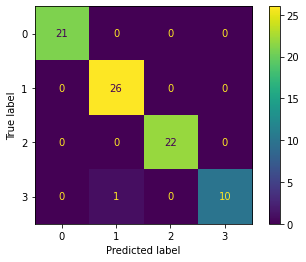

In [88]:
# ploting the confusion matrix 
print("Confusion Matrix for the first approach (voting)")
p=ConfusionMatrixDisplay(cm,display_labels= [0,1,2,3])
p.plot()

In [89]:
print(f"Accuracy depending on the voting  : {accuracy_score(list(check_testSet),list(handUpResults))*100}%")

Accuracy depending on the voting  : 98.75%


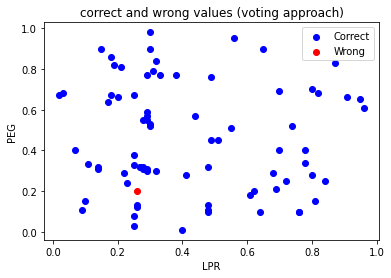

In [90]:

#plotting correct and wrong prediction points
_,ax = plt.subplots()

ax.scatter(x=X_test_DF[check_testSet==handUpResults][0], y=X_test_DF[check_testSet==handUpResults][1], c = 'blue', label = 'Correct', alpha = 1)
ax.scatter(x=X_test_DF[check_testSet!=handUpResults][0], y=X_test_DF[check_testSet!=handUpResults][1], c = 'red', label = 'Wrong', alpha = 1)

plt.title('correct and wrong values (voting approach)')
plt.xlabel(axis_labels[0])
plt.ylabel(axis_labels[1])
plt.legend()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------

## `References`

1. Lecture notes 
2. Lab Notes 
